## Model Used: Decision Tree
### Data used: PCA data
### Methods used: Under Sampling and RandomizedSearchCV
### Accuracy: Train: 96% , Test: 35%

In [2]:
import dask.dataframe as dd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import gc
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline

In [3]:
train = pd.read_csv('/home/aban/somu/review-2/pca_data2.csv')
test = pd.read_csv('/home/aban/somu/review-2/pca_test.csv')

In [4]:
train.columns

Index(['Unnamed: 0', 'pc 1', 'pc 2', 'pc 3', 'pc 4', 'pc 5', 'pc 6', 'pc 7',
       'pc 8', 'pc 9', 'pc 10', 'pc 11', 'pc 12', 'pc 13', 'pc 14', 'pc 15',
       'pc 16', 'pc 17', 'pc 18', 'pc 19', 'pc 20', 'pc 21', 'pc 22', 'pc 23',
       'pc 24', 'Label'],
      dtype='object')

In [5]:
test.columns

Index(['Unnamed: 0', 'pc 1', 'pc 2', 'pc 3', 'pc 4', 'pc 5', 'pc 6', 'pc 7',
       'pc 8', 'pc 9', 'pc 10', 'pc 11', 'pc 12', 'pc 13', 'pc 14', 'pc 15',
       'pc 16', 'pc 17', 'pc 18', 'pc 19', 'pc 20', 'pc 21', 'pc 22', 'pc 23',
       'pc 24'],
      dtype='object')

In [7]:
x_train = train.iloc[:,1:25]
x_train.columns

Index(['pc 1', 'pc 2', 'pc 3', 'pc 4', 'pc 5', 'pc 6', 'pc 7', 'pc 8', 'pc 9',
       'pc 10', 'pc 11', 'pc 12', 'pc 13', 'pc 14', 'pc 15', 'pc 16', 'pc 17',
       'pc 18', 'pc 19', 'pc 20', 'pc 21', 'pc 22', 'pc 23', 'pc 24'],
      dtype='object')

In [8]:
y = train['Label']

In [9]:
test = test.drop(columns=['Unnamed: 0'])

In [10]:
test.columns

Index(['pc 1', 'pc 2', 'pc 3', 'pc 4', 'pc 5', 'pc 6', 'pc 7', 'pc 8', 'pc 9',
       'pc 10', 'pc 11', 'pc 12', 'pc 13', 'pc 14', 'pc 15', 'pc 16', 'pc 17',
       'pc 18', 'pc 19', 'pc 20', 'pc 21', 'pc 22', 'pc 23', 'pc 24'],
      dtype='object')

In [12]:
for column in x_train:
 if x_train[column].dtype == 'float64':
     x_train[column]=pd.to_numeric(x_train[column], downcast='float')

In [13]:
for column in test:
 if test[column].dtype == 'float64':
     test[column]=pd.to_numeric(test[column], downcast='float')

In [16]:
del(train)
gc.collect()

0

<AxesSubplot: xlabel='Label', ylabel='count'>

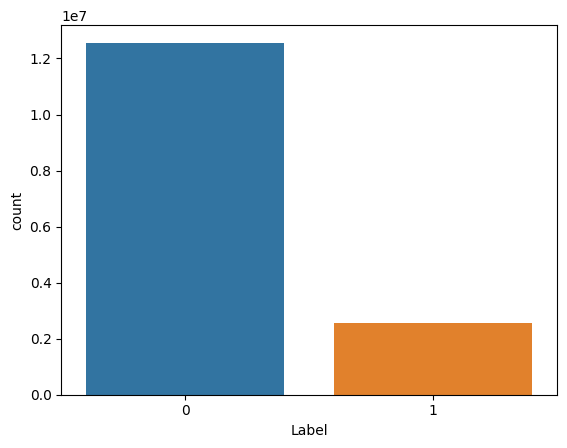

In [25]:
sns.countplot(x=y)

In [24]:
y.value_counts()

0    12562406
1     2577087
Name: Label, dtype: int64

In [26]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(x_train, y)

In [27]:
!pip install scipy
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

You should consider upgrading via the '/home/aban/somu/env/bin/python3.8 -m pip install --upgrade pip' command.


In [28]:
params = {'max_depth' : [3,5,8,None],
         'max_features': ['auto','log2',None],
         }
x_clf = DecisionTreeClassifier()

random_clf = RandomizedSearchCV(x_clf, param_distributions=params, scoring='f1', verbose=1, cv=2, n_jobs=-1)
random_clf.fit(X_under,y_under)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


/home/aban/somu/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/aban/somu/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/aban/somu/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/aban/somu/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  war

RandomizedSearchCV(cv=2, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 8, None],
                                        'max_features': ['auto', 'log2', None]},
                   scoring='f1', verbose=1)

In [29]:
print(random_clf.best_params_)
print(random_clf.best_score_)

{'max_features': None, 'max_depth': 8}
0.9719599078260939


In [32]:
model = DecisionTreeClassifier(max_depth=8,max_features=None)
model.fit(X_under,y_under)

DecisionTreeClassifier(max_depth=8)

In [33]:
y_pred = model.predict(test)

In [34]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
dtree_pred = pd.DataFrame(y_pred)

In [37]:
dtree_pred.to_csv('./dtree_pred.csv')